# Simple linear models

- "model_formulas" is based on examples in Kaplan "Statistical Modeling".
- "polynomial_regression" shows how to work with simple design matrices, like MATLAB's "regress" command.

Author: Thomas Haslwanter, Date:   Feb-2017

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from urllib.request import urlopen
from statsmodels.formula.api import ols
import statsmodels.regression.linear_model as sm
from statsmodels.stats.anova import anova_lm

## Define models through formulas

In [3]:
# Get the data
inFile = 'swim100m.csv'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_kaplan/'
url = url_base + inFile
data = pd.read_csv(urlopen(url))
data.head()

,year,time,sex
0,1905,65.8,M
1,1908,65.6,M
2,1910,62.8,M
3,1912,61.6,M
4,1918,61.4,M


### OLS Model

In [4]:
# Different models
model1 = ols("time ~ sex", data).fit()  # one factor
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     24.13
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           7.28e-06
Time:                        16:34:00   Log-Likelihood:                -219.23
No. Observations:                  62   AIC:                             442.5
Df Residuals:                      60   BIC:                             446.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1923      1.517     42.986      0.0

### ANOVA

In [5]:
print(anova_lm(model1))

            df       sum_sq      mean_sq          F    PR(>F)
sex        1.0  1720.655232  1720.655232  24.132575  0.000007
Residual  60.0  4278.006477    71.300108        NaN       NaN


In [6]:
model2 = ols("time ~ sex + year", data).fit()   # two factors
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     159.6
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           1.58e-24
Time:                        16:35:08   Log-Likelihood:                -172.12
No. Observations:                  62   AIC:                             350.2
Df Residuals:                      59   BIC:                             356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    555.7168     33.800     16.441      0.0

In [7]:
print(anova_lm(model2))

            df       sum_sq      mean_sq           F        PR(>F)
sex        1.0  1720.655232  1720.655232  108.479881  5.475511e-15
year       1.0  3342.177104  3342.177104  210.709831  3.935386e-21
Residual  59.0   935.829374    15.861515         NaN           NaN


In [8]:
model3 = ols("time ~ sex * year", data).fit()   # two factors with interaction
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     162.1
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           3.67e-28
Time:                        16:37:19   Log-Likelihood:                -160.30
No. Observations:                  62   AIC:                             328.6
Df Residuals:                      58   BIC:                             337.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       697.3012     39.221     17.779

In [9]:
print(anova_lm(model3))

            df       sum_sq      mean_sq           F        PR(>F)
sex        1.0  1720.655232  1720.655232  156.140793  4.299569e-18
year       1.0  3342.177104  3342.177104  303.285733  1.039245e-24
sex:year   1.0   296.675432   296.675432   26.921801  2.826421e-06
Residual  58.0   639.153942    11.019896         NaN           NaN


# Polynomial Regression

Here we define the model directly through the design matrix. Similar to MATLAB's "regress" command.

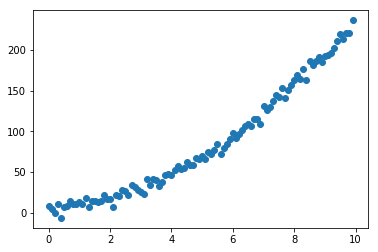

In [12]:
# Generate the data
t = np.arange(0,10,0.1)
y = 4 + 3*t + 2*t**2 + 5*np.random.randn(len(t))
plt.scatter(t, y)
plt.show()

In [14]:
# Make the fit. Note that this is another "OLS" than the one in "model_formulas"!
M = np.column_stack((np.ones(len(t)), t, t**2)) # this constant is for 'coeff b'
M[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.1 , 0.01],
       [1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.4 , 0.16],
       [1.  , 0.5 , 0.25],
       [1.  , 0.6 , 0.36],
       [1.  , 0.7 , 0.49],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81]])

In [15]:
res = sm.OLS(y, M).fit()    
# Display the results
print('Summary:')
print(res.summary())

Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9125.
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          3.76e-111
Time:                        16:52:10   Log-Likelihood:                -301.96
No. Observations:                 100   AIC:                             609.9
Df Residuals:                      97   BIC:                             617.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1748      1.480      3.497

In [16]:
print('The fit parameters are: {0}'.format(str(res.params)))
print('The confidence intervals are:')
print(res.conf_int())

The fit parameters are: [5.17484326 2.29862778 2.08387109]
The confidence intervals are:
[[2.23744124 8.11224529]
 [0.92731999 3.66993557]
 [1.94983692 2.21790527]]
